In [0]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [0]:
f = open(r"assignment-3_dataset.txt","r")

In [0]:
with open("assignment-3_dataset.txt","r") as file:
    D = file.read()

In [0]:
words = D.split("\n")

In [4]:
len(words)

1006

In [0]:
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

In [0]:
dis = np.zeros((len(words),len(words)))
for x in range(len(words)):
    for y in range(len(words)):
        dis[x][y] = levenshtein(words[x],words[y])

In [0]:
#dis = dis/np.max(dis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


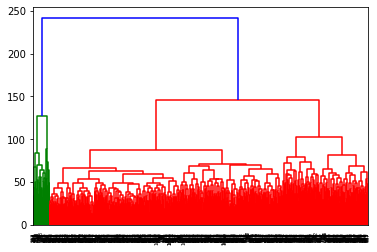

In [8]:
dendrogram = sch.dendrogram(sch.linkage(dis,method = 'complete'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


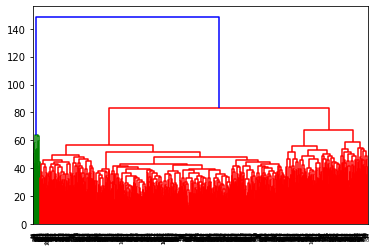

In [9]:
dendrogram = sch.dendrogram(sch.linkage(dis,method = 'average'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


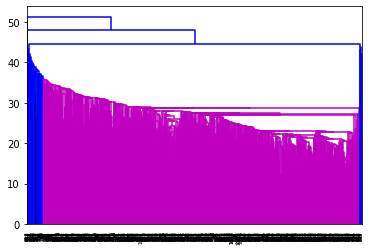

In [10]:
dendrogram = sch.dendrogram(sch.linkage(dis,method = 'single'))

In [0]:
threshold = np.arange(1,16,0.05)

In [0]:
nos_of_clusters = []
for x in threshold:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', memory=None, connectivity=None, compute_full_tree='true',linkage='complete', distance_threshold=x)
    y = clustering.fit_predict(dis)
    nos_of_clusters.append(np.max(y))

In [0]:
import matplotlib.pyplot as plt

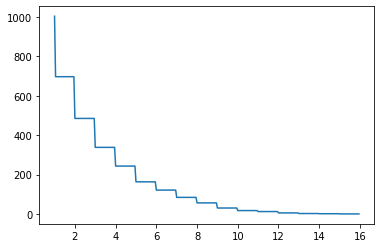

In [14]:
plt.plot(threshold,nos_of_clusters)

As, The slope of the graph becomes constant near threshold = 9.

In [0]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', memory=None, connectivity=None, compute_full_tree='true',linkage='complete', distance_threshold=9)

In [0]:
y = clustering.fit_predict(dis)

In [0]:
clusters,cluster_counts = np.unique(y,return_counts= True)

In [18]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

In [0]:
dic = {}
stems = []
i = 0
for x in clusters:
    l = []
    for i in range(len(y)):
        if y[i] == x:
            l.append(words[i])
    l.sort(key = len)
    stems.append(l[0])
    dic[x] = l

In [0]:
dic1 = {}
for key,value in dic.items():
    for x in value:
        dic1[x] = key

In [0]:
stemmer = PorterStemmer()

In [0]:
counter = 0
for word in words:
    if stems[dic1[word]] == stemmer.stem(word):
        #print(stems[dic1[word]])
        #print(stemmer.stem(word))
        counter = counter + 1

In [0]:
Eff = counter/len(words)

In [24]:
Eff

0.12127236580516898